In [118]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Crawling data using BeautifulSoup package

Select URLs

In [119]:
url_lists = []
for year in range(1950, 2008):
  next_year_str = str(year + 1)
  url = "http://www.rsssf.com/engpaul/FLA/" + str(year) + "-" + next_year_str[-2:] + ".html"
  url_lists.append(url)
  print(url)

http://www.rsssf.com/engpaul/FLA/1950-51.html
http://www.rsssf.com/engpaul/FLA/1951-52.html
http://www.rsssf.com/engpaul/FLA/1952-53.html
http://www.rsssf.com/engpaul/FLA/1953-54.html
http://www.rsssf.com/engpaul/FLA/1954-55.html
http://www.rsssf.com/engpaul/FLA/1955-56.html
http://www.rsssf.com/engpaul/FLA/1956-57.html
http://www.rsssf.com/engpaul/FLA/1957-58.html
http://www.rsssf.com/engpaul/FLA/1958-59.html
http://www.rsssf.com/engpaul/FLA/1959-60.html
http://www.rsssf.com/engpaul/FLA/1960-61.html
http://www.rsssf.com/engpaul/FLA/1961-62.html
http://www.rsssf.com/engpaul/FLA/1962-63.html
http://www.rsssf.com/engpaul/FLA/1963-64.html
http://www.rsssf.com/engpaul/FLA/1964-65.html
http://www.rsssf.com/engpaul/FLA/1965-66.html
http://www.rsssf.com/engpaul/FLA/1966-67.html
http://www.rsssf.com/engpaul/FLA/1967-68.html
http://www.rsssf.com/engpaul/FLA/1968-69.html
http://www.rsssf.com/engpaul/FLA/1969-70.html
http://www.rsssf.com/engpaul/FLA/1970-71.html
http://www.rsssf.com/engpaul/FLA/1

Download Dataset

In [120]:
# Download football league data from selected URLs
def download_data(url_lists):
  for url in url_lists:
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    x = str(soup)
    data = x.split("\n")
    num = 0
    for each in data:
      if num == 20:
        break
      if each.strip() != '':
        if each.strip()[0].isnumeric():
        #print(each)
        
          team1="" 
          spi = each.strip().split(" ")
  
          pt=[]
          for each in spi:
            if each.lstrip("-").isnumeric():
              pt.append(each.strip())
            

          if len(pt) >= 12:
            try:
              team1 = spi[1].capitalize()
              team1 += ' '+spi[2].capitalize()
              if not spi[3].isnumeric():
                team1 += ' '+spi[3].capitalize()

              Team.append(team1.strip()) 
              MP.append(int(pt[0]))

              Win_Home.append(int(pt[1]))
              Draw_Home.append(int(pt[2]))
              Lost_Home.append(int(pt[3]))
              GF_Home.append(int(pt[4]))
              GA_Home.append(int(pt[5]))

              Win_Away.append(int(pt[6]))
              Draw_Away.append(int(pt[7]))
              Lost_Away.append(int(pt[8]))
              GF_Away.append(int(pt[9]))
              GA_Away.append(int(pt[10]))

              Win.append(int(pt[1]) + int(pt[6]))
              Draw.append(int(pt[2]) + int(pt[7]))
              Lost.append(int(pt[3]) + int(pt[8]))
              GF.append(int(pt[4]) + int(pt[9]))
              GA.append(int(pt[5]) + int(pt[10]))
            
              if len(pt) == 12:
                  Pts.append(int(pt[11]))
              else:
                  Pts.append(int(pt[12]))
              Place.append(int(spi[0].replace(".", "")))
              num = num + 1
            except:
              pass

In [121]:
# Initialize variables
Team = []
MP = []
Win_Home = []
Draw_Home = []
Lost_Home = []
GF_Home = []
GA_Home = []

Win_Away = []
Draw_Away = []
Lost_Away = []
GF_Away = []
GA_Away = []

Win = []
Draw = []
Lost = []
GF = []
GA = []

Pts = []
Place = []

download_data(url_lists)

http://www.rsssf.com/engpaul/FLA/1950-51.html
http://www.rsssf.com/engpaul/FLA/1951-52.html
http://www.rsssf.com/engpaul/FLA/1952-53.html
http://www.rsssf.com/engpaul/FLA/1953-54.html
http://www.rsssf.com/engpaul/FLA/1954-55.html
http://www.rsssf.com/engpaul/FLA/1955-56.html
http://www.rsssf.com/engpaul/FLA/1956-57.html
http://www.rsssf.com/engpaul/FLA/1957-58.html
http://www.rsssf.com/engpaul/FLA/1958-59.html
http://www.rsssf.com/engpaul/FLA/1959-60.html
http://www.rsssf.com/engpaul/FLA/1960-61.html
http://www.rsssf.com/engpaul/FLA/1961-62.html
http://www.rsssf.com/engpaul/FLA/1962-63.html
http://www.rsssf.com/engpaul/FLA/1963-64.html
http://www.rsssf.com/engpaul/FLA/1964-65.html
http://www.rsssf.com/engpaul/FLA/1965-66.html
http://www.rsssf.com/engpaul/FLA/1966-67.html
http://www.rsssf.com/engpaul/FLA/1967-68.html
http://www.rsssf.com/engpaul/FLA/1968-69.html
http://www.rsssf.com/engpaul/FLA/1969-70.html
http://www.rsssf.com/engpaul/FLA/1970-71.html
http://www.rsssf.com/engpaul/FLA/1

In [122]:
#Converting into dataframe
import pandas as pd
df = pd.DataFrame(
    {'Team': Team,'MP': MP,
     'Win_Home': Win_Home,'Draw_Home': Draw_Home,'Lost_Home': Lost_Home,'GF_Home': GF_Home,'GA_Home': GA_Home,
     'Win_Away': Win_Away,'Draw_Away': Draw_Away,'Lost_Away': Lost_Away,'GF_Away': GF_Away,'GA_Away': GA_Away,
     'GF':GF, 'Points':Pts, 'Place':Place,
    })
df

,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
0,Tottenham Hotspur,42,17,2,2,54,21,8,8,5,28,23,82,60,1
1,Manchester United,42,14,4,3,42,16,10,4,7,32,24,74,56,2
2,Blackpool,42,12,6,3,43,19,8,4,9,36,34,79,50,3
3,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,62,49,4
4,Arsenal,42,11,5,5,47,28,8,4,9,26,28,73,47,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,Bolton Wanderers,38,7,5,7,23,18,2,5,12,13,36,36,37,16
1156,Fulham,38,5,5,9,22,31,3,7,9,16,29,38,36,17
1157,Reading,38,8,2,9,19,25,2,4,13,22,41,41,36,18
1158,Birmingham City,38,6,8,5,30,23,2,3,14,16,39,46,35,19


In [123]:
df_visual = pd.DataFrame(
    {'Team': Team,'Win': Win,'Draw': Draw_Home,'Lost':Lost,
     'GF':GF,'GA':GA,'Points':Pts, 'Place':Place})
df_visual

,Team,Win,Draw,Lost,GF,GA,Points,Place
0,Tottenham Hotspur,25,2,7,82,44,60,1
1,Manchester United,24,4,10,74,40,56,2
2,Blackpool,20,6,12,79,53,50,3
3,Newcastle United,18,6,11,62,53,49,4
4,Arsenal,19,5,14,73,56,47,5
...,...,...,...,...,...,...,...,...
1155,Bolton Wanderers,9,5,19,36,54,37,16
1156,Fulham,8,5,18,38,60,36,17
1157,Reading,10,2,22,41,66,36,18
1158,Birmingham City,8,8,19,46,62,35,19


In [124]:
# Initialize variables
Team = []
MP = []
Win_Home = []
Draw_Home = []
Lost_Home = []
GF_Home = []
GA_Home = []

Win_Away = []
Draw_Away = []
Lost_Away = []
GF_Away = []
GA_Away = []

Win = []
Draw = []
Lost = []
GF = []
GA = []

Pts = []
Place = []

download_data(['http://www.rsssf.com/engpaul/FLA/2007-08.html'])

http://www.rsssf.com/engpaul/FLA/2007-08.html


In [125]:
#Converting into dataframe
import pandas as pd
df_test = pd.DataFrame(
    {'Team': Team,'MP': MP,
     'Win_Home': Win_Home,'Draw_Home': Draw_Home,'Lost_Home': Lost_Home,'GF_Home': GF_Home,'GA_Home': GA_Home,
     'Win_Away': Win_Away,'Draw_Away': Draw_Away,'Lost_Away': Lost_Away,'GF_Away': GF_Away,'GA_Away': GA_Away,
     'GF': GF, 'Points':Pts, 'Place':Place,
    })
df_test

,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
0,Manchester United,38,17,1,1,47,7,10,5,4,33,15,80,87,1
1,Chelsea,38,12,7,0,36,13,13,3,3,29,13,65,85,2
2,Arsenal,38,14,5,0,37,11,10,6,3,37,20,74,83,3
3,Liverpool,38,12,6,1,43,13,9,7,3,24,15,67,76,4
4,Everton,38,11,4,4,34,17,8,4,7,21,16,55,65,5
5,Aston Villa,38,10,3,6,34,22,6,9,4,37,29,71,60,6
6,Blackburn Rovers,38,8,7,4,26,19,7,6,6,24,29,50,58,7
7,Portsmouth,38,7,8,4,24,14,9,1,9,24,26,48,57,8
8,Manchester City,38,11,4,4,28,20,4,6,9,17,33,45,55,9
9,West Ham United,38,7,7,5,24,24,6,3,10,18,26,42,49,10


# Pre-processing

Number of teams

In [126]:
print('Number of teams:', len(df['Team'].unique()))

Number of teams: 62


In [127]:
# Remove null values
df =df.dropna()

#Applying encoding
df_team= df["Team"]
df_team = df_team.astype('category')
df_team = df_team.cat.codes
df.insert(0, 'TeamID', df_team)

df.head(10)

,TeamID,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
0,51,Tottenham Hotspur,42,17,2,2,54,21,8,8,5,28,23,82,60,1
1,30,Manchester United,42,14,4,3,42,16,10,4,7,32,24,74,56,2
2,8,Blackpool,42,12,6,3,43,19,8,4,9,36,34,79,50,3
3,33,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,62,49,4
4,3,Arsenal,42,11,5,5,47,28,8,4,9,26,28,73,47,5
5,31,Middlesbrough,42,12,7,2,51,25,6,4,11,25,40,76,47,6
6,39,Portsmouth,42,8,10,3,39,30,8,5,8,32,38,71,47,7
7,9,Bolton Wanderers,42,11,2,8,31,20,8,5,8,33,41,64,45,8
8,27,Liverpool,42,11,5,5,28,25,5,6,10,25,34,53,43,9
9,13,Burnley,42,9,7,5,27,16,5,7,9,21,27,48,42,10


In [128]:
df_test_visual = pd.DataFrame(
    {'Team': Team,'Win': Win,'Draw': Draw_Home,'Lost':Lost,
     'GF':GF,'GA':GA,'Points':Pts, 'Place':Place})
df_test_visual

,Team,Win,Draw,Lost,GF,GA,Points,Place
0,Manchester United,27,1,5,80,22,87,1
1,Chelsea,25,7,3,65,26,85,2
2,Arsenal,24,5,3,74,31,83,3
3,Liverpool,21,6,4,67,28,76,4
4,Everton,19,4,11,55,33,65,5
5,Aston Villa,16,3,10,71,51,60,6
6,Blackburn Rovers,15,7,10,50,48,58,7
7,Portsmouth,16,8,13,48,40,57,8
8,Manchester City,15,4,13,45,53,55,9
9,West Ham United,13,7,15,42,50,49,10


In [129]:
# Remove null values
df_test =df_test.dropna()

#Applying encoding
df_team= df_test["Team"]
df_team = df_team.astype('category')
df_team = df_team.cat.codes
df_test.insert(0, 'TeamID', df_team)

df_test.head(10)

,TeamID,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
0,11,Manchester United,38,17,1,1,47,7,10,5,4,33,15,80,87,1
1,5,Chelsea,38,12,7,0,36,13,13,3,3,29,13,65,85,2
2,0,Arsenal,38,14,5,0,37,11,10,6,3,37,20,74,83,3
3,9,Liverpool,38,12,6,1,43,13,9,7,3,24,15,67,76,4
4,7,Everton,38,11,4,4,34,17,8,4,7,21,16,55,65,5
5,1,Aston Villa,38,10,3,6,34,22,6,9,4,37,29,71,60,6
6,3,Blackburn Rovers,38,8,7,4,26,19,7,6,6,24,29,50,58,7
7,14,Portsmouth,38,7,8,4,24,14,9,1,9,24,26,48,57,8
8,10,Manchester City,38,11,4,4,28,20,4,6,9,17,33,45,55,9
9,18,West Ham United,38,7,7,5,24,24,6,3,10,18,26,42,49,10


In [130]:
#EDA
df.describe()

,TeamID,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,29.489655,39.801724,11.393966,5.428448,4.874138,34.395690,23.336207,5.873276,5.388793,9.597414,23.401724,33.641379,57.797414,47.759483,10.500000
std,16.573050,6.015826,6.291383,2.246282,2.309829,11.356008,7.073561,3.995940,2.032025,3.035168,7.676752,9.826924,17.183559,14.472189,5.768768
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,8.000000,6.000000,-32.000000,1.000000
25%,17.750000,38.000000,8.000000,4.000000,3.000000,27.000000,18.000000,4.000000,4.000000,8.000000,18.000000,27.000000,47.000000,39.000000,5.750000
50%,28.000000,42.000000,10.000000,5.000000,5.000000,34.000000,23.000000,5.000000,5.000000,10.000000,23.000000,33.000000,57.000000,46.000000,10.500000
75%,46.000000,42.000000,13.000000,7.000000,6.000000,42.000000,28.000000,7.000000,7.000000,12.000000,28.000000,40.000000,69.000000,55.000000,15.250000
max,61.000000,42.000000,42.000000,17.000000,14.000000,72.000000,54.000000,33.000000,13.000000,18.000000,50.000000,71.000000,115.000000,95.000000,20.000000


In [131]:
dfx = df_visual.groupby('Team').sum()
print(len(dfx))

62


In [132]:
df10 = dfx.nlargest(20, 'Win')
df10

,Win,Draw,Lost,GF,GA,Points,Place
Team,,,,,,,
Manchester United,1187,277,543,3909,2730,3394,264
Arsenal,1160,300,646,3662,2825,3233,353
Liverpool,1088,236,453,3151,1973,3091,181
Tottenham Hotspur,1009,259,745,3466,3092,2727,447
Everton,968,301,733,3076,2825,2722,505
Chelsea,886,249,582,2842,2531,2442,408
Aston Villa,776,231,650,2488,2497,2177,456
Manchester City,740,222,665,2451,2531,1878,510
Leeds United,723,193,399,2043,1655,1842,252


# Top wins by the team

<AxesSubplot:xlabel='Team'>

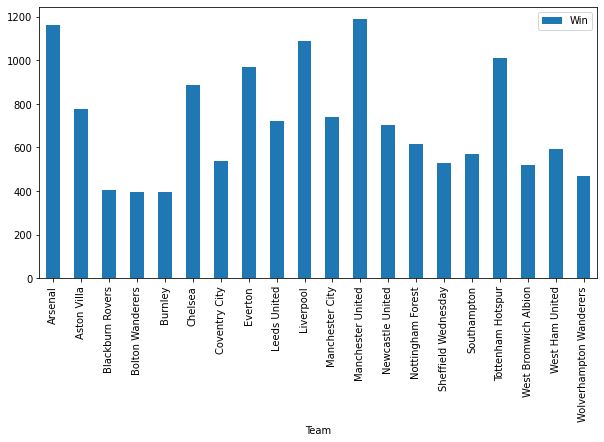

In [133]:
df10[['Win']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top loss by team

<AxesSubplot:xlabel='Team'>

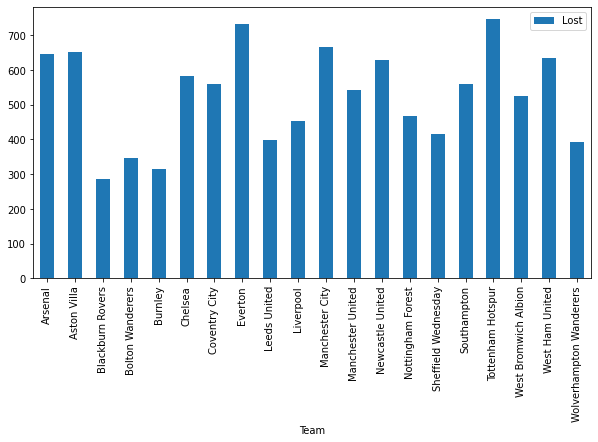

In [134]:
df10[['Lost']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top goal-for by team

<AxesSubplot:xlabel='Team'>

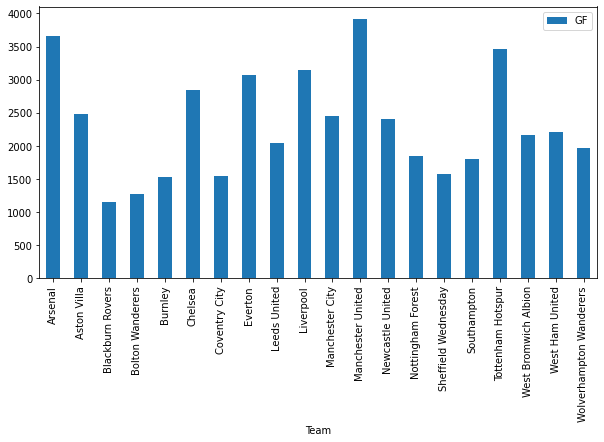

In [135]:
df10[['GF']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top goals against by team

<AxesSubplot:xlabel='Team'>

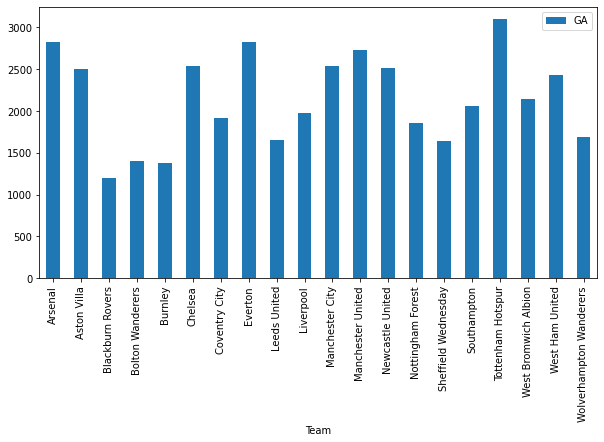

In [136]:
df10[['GA']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top total points by team

<AxesSubplot:xlabel='Team'>

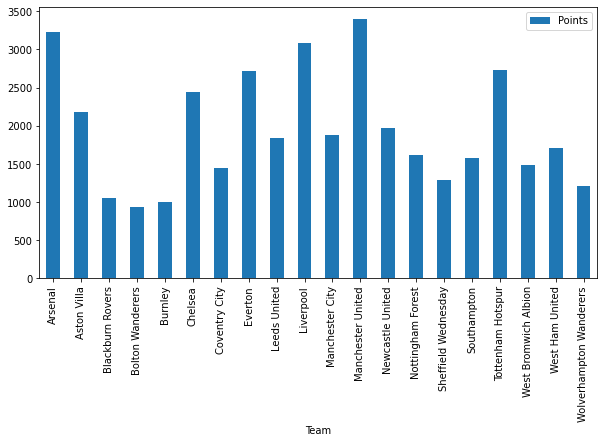

In [137]:
df10[['Points']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Splitting the data to make it the test and train

As we are going to predict the coninuous variables
So we will use linear regression, So we have 3 predictions to make.

In [138]:
X = df.drop(['Team','MP','Place'], axis = 1)
y = df['Place']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_current = df_test.drop(['Team','MP','Place'], axis = 1)
y_current = df_test["Place"]

# Using decision Tree

In [139]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_current)

df_test['Prediction'] = y_pred
df_test

,TeamID,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place,Prediction
0,11,Manchester United,38,17,1,1,47,7,10,5,4,33,15,80,87,1,1
1,5,Chelsea,38,12,7,0,36,13,13,3,3,29,13,65,85,2,2
2,0,Arsenal,38,14,5,0,37,11,10,6,3,37,20,74,83,3,3
3,9,Liverpool,38,12,6,1,43,13,9,7,3,24,15,67,76,4,4
4,7,Everton,38,11,4,4,34,17,8,4,7,21,16,55,65,5,4
5,1,Aston Villa,38,10,3,6,34,22,6,9,4,37,29,71,60,6,6
6,3,Blackburn Rovers,38,8,7,4,26,19,7,6,6,24,29,50,58,7,7
7,14,Portsmouth,38,7,8,4,24,14,9,1,9,24,26,48,57,8,8
8,10,Manchester City,38,11,4,4,28,20,4,6,9,17,33,45,55,9,8
9,18,West Ham United,38,7,7,5,24,24,6,3,10,18,26,42,49,10,12


# Difference between prediction and real palces

In [140]:
# get percent of correct match
acc = clf.score(X_test, y_test)
print('Correct Match:', acc*100, '%')

# compute variance
x = df_test['Prediction']
y = df_test['Place']

dist = np.mean([abs(a - b) for (a, b) in zip(x, y)])
print('Average difference of ranks:', dist)

Correct Match: 24.137931034482758 %
Average difference of ranks: 0.9


## Confusion matirx

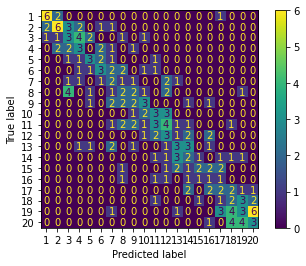

In [141]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)


# Classification report for the season winner model




In [142]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         9
           2       0.55      0.40      0.46        15
           3       0.21      0.23      0.22        13
           4       0.23      0.27      0.25        11
           5       0.33      0.33      0.33         9
           6       0.33      0.27      0.30        11
           7       0.14      0.20      0.17        10
           8       0.17      0.14      0.15        14
           9       0.20      0.17      0.18        12
          10       0.20      0.22      0.21         9
          11       0.23      0.19      0.21        16
          12       0.17      0.27      0.21        11
          13       0.25      0.23      0.24        13
          14       0.15      0.18      0.17        11
          15       0.40      0.18      0.25        11
          16       0.10      0.14      0.12         7
          17       0.18      0.20      0.19        10
          18       0.14    

Text(0.5, 1.0, 'Average Difference of Ranks')

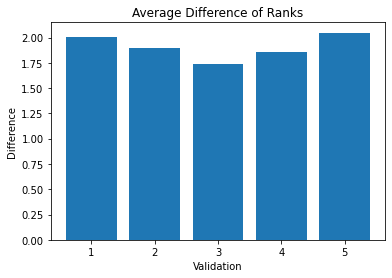

In [143]:
from sklearn.model_selection import KFold
X =df.drop(['Team','MP','Place'], axis = 1)
y = df["Place"]

diff = []
kf = KFold(n_splits=5, shuffle  = True, random_state = 42)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_val_train, X_val_test = X.iloc[train_index], X.iloc[test_index]
    y_val_train, y_val_test = y[train_index], y[test_index]
    clf.fit(X_val_train, y_val_train)

    y_val_pred = clf.predict(X_val_test)
    diff.append(np.mean(abs(np.array(y_val_test) - np.array(y_val_pred))))
plt.bar(range(1,6), diff)
plt.xlabel('Validation')
plt.ylabel('Difference')
plt.title('Average Difference of Ranks')

In [144]:
#Which team will score more goals
X = df[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y = df_visual["GF"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_current = df_test[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y_current = df_test_visual["GF"]


# Predicting the highest score

In [145]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_current)
df_goal = df_test[['Team', 'GF']]
df_goal['Pred_GF'] = y_pred
df_goal.head(20)

,Team,GF,Pred_GF
0,Manchester United,80,80
1,Chelsea,65,65
2,Arsenal,74,74
3,Liverpool,67,67
4,Everton,55,55
5,Aston Villa,71,71
6,Blackburn Rovers,50,50
7,Portsmouth,48,50
8,Manchester City,45,45
9,West Ham United,42,42


Predict which team will score the most goals in current season.

In [146]:
res = df_goal[df_goal['Pred_GF'] == max(df_goal['Pred_GF'])].head(1)
print(res)


                Team  GF  Pred_GF
0  Manchester United  80       80


In [147]:
print("The team will score most is which is predicted is: ",str(res['Team'].values))

The team will score most is which is predicted is:  ['Manchester United']


# Validation for the predictions of highest goals

Text(0.5, 1.0, 'Average Difference between predicted and real goals')

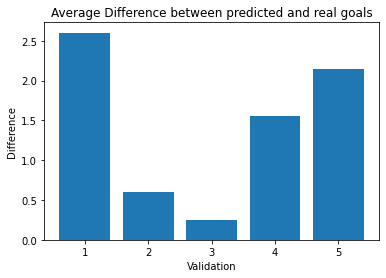

In [148]:
from sklearn.model_selection import KFold
X = df[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y = df_visual["GF"]

diff = []
kf = KFold(n_splits=5, shuffle  = True, random_state = 42)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_val_train, X_val_test = X.iloc[train_index], X.iloc[test_index]
    y_val_train, y_val_test = y[train_index], y[test_index]
    clf.fit(X_val_train, y_val_train)

    y_val_pred = clf.predict(X_current)
    diff.append(np.mean(abs(np.array(y_current) - np.array(y_val_pred))))
plt.bar(range(1,6), diff)
plt.xlabel('Validation')
plt.ylabel('Difference')
plt.title('Average Difference between predicted and real goals')

# Penalties data

In [149]:
#!pip install cloudscraper
import cloudscraper
scraper = cloudscraper.create_scraper()  # returns a CloudScraper instance
# Or: scraper = cloudscraper.CloudScraper()  
x = scraper.get("https://www.myfootballfacts.com/premier-league/all-time-premier-league/premier-league-penalty-statistics/").text
#print(x)
teams=["Chelsea","West Ham United",
       "Leeds United","Arsenal","Everton",
       "Manchester City","Brighton & Hove Albion","Manchester United","Crystal Palace","Brentford","Southampton","Liverpool","Norwich City",
       "Aston  Villa","Watford","Tottenham","Hotspur","Leicester City","Newcastle United","Wolverhampton Wanderers","Burnley"]

page_content = BeautifulSoup(x, "html.parser")
tbod = page_content.find('tbody').get_text()
tbod
# result = soup.select('tbody.tr.row1.odd')
# result
type(tbod)
tbod = tbod.split('\n')
clean_list = []
for each in tbod:
  clean_list.append(each.replace('\xa0',''))
data = clean_list[424:len(clean_list)]
list1 = ["Premier League Penalties 2019-20"]
i=-1
location=[]
for each in data:
  i=i+1
  if each in teams:
    #print(each)
    location.append(i)
Team=[]
For=[]
Against=[]	
Home=[]	
Away=[]
Scored=[]
Missed=[]	
Saved=[]
for each in location:
  if data[each].strip() != '' and data[each+1].strip() != '' and data[each+2].strip() != '' and data[each+3].strip() != '' and data[each+4].strip() != '' and data[each+5].strip():
    Team.append(data[each].strip())
    For.append(int(data[each+1]))
    Against.append(int(data[each+2]))
    Home.append(int(data[each+3]))
    Away.append(int(data[each+4]))
    Scored.append(int(data[each+5]))
    Missed.append(int(data[each+6]))
    Saved.append(int(data[each+7]))


In [150]:
#Converting into dataframe
import pandas as pd
df = pd.DataFrame(
    {'Team': Team, 'For': For,
     'Against': Against, 'Home': Home,
     'Away': Away, 'Scored':Scored     
    })
df

,Team,For,Against,Home,Away,Scored
0,Chelsea,7,4,4,3,7
1,West Ham United,5,2,2,3,3
2,Leeds United,4,3,3,1,4
3,Arsenal,4,3,3,1,1
4,Brighton & Hove Albion,4,3,4,0,3
...,...,...,...,...,...,...
124,Arsenal,5,6,4,1,4
125,Newcastle United,4,4,3,1,4
126,West Ham United,4,2,4,0,4
127,Southampton,3,5,1,2,3


In [151]:
#Drop NA
df = df.dropna()
df

,Team,For,Against,Home,Away,Scored
0,Chelsea,7,4,4,3,7
1,West Ham United,5,2,2,3,3
2,Leeds United,4,3,3,1,4
3,Arsenal,4,3,3,1,1
4,Brighton & Hove Albion,4,3,4,0,3
...,...,...,...,...,...,...
124,Arsenal,5,6,4,1,4
125,Newcastle United,4,4,3,1,4
126,West Ham United,4,2,4,0,4
127,Southampton,3,5,1,2,3


# Most goals by the team

<AxesSubplot:xlabel='Team'>

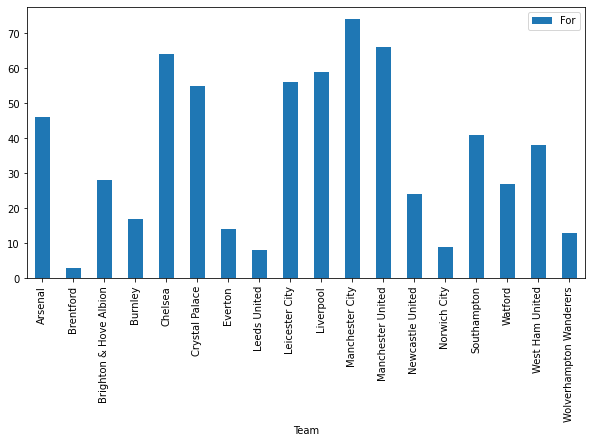

In [152]:
df[['Team','For']].groupby(['Team']).sum(['For']).plot(kind="bar",figsize=(10,5))

# Most scored by the teams

<AxesSubplot:xlabel='Team'>

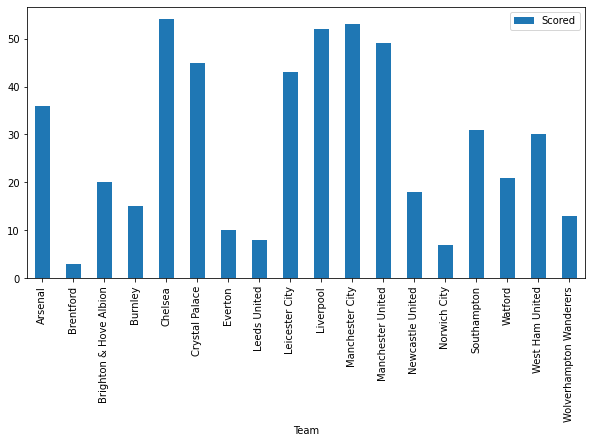

In [153]:
df[['Team','Scored']].groupby(['Team']).sum(['Scored']).plot(kind="bar",figsize=(10,5))

#Enconding the values

In [154]:
df['Nonencoding']= df["Team"]
df["Team"] = df["Team"].astype('category')
df["Team"] = df["Team"].cat.codes
df

,Team,For,Against,Home,Away,Scored,Nonencoding
0,4,7,4,4,3,7,Chelsea
1,16,5,2,2,3,3,West Ham United
2,7,4,3,3,1,4,Leeds United
3,0,4,3,3,1,1,Arsenal
4,2,4,3,4,0,3,Brighton & Hove Albion
...,...,...,...,...,...,...,...
124,0,5,6,4,1,4,Arsenal
125,12,4,4,3,1,4,Newcastle United
126,16,4,2,4,0,4,West Ham United
127,14,3,5,1,2,3,Southampton


In [155]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X =df[['Scored']]
y = df["Team"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X_test, y_test)
x = int(clf.predict([[50]]))
res = df[df['Team'] == x].head(1)
print("The team will score most penalties are is predicted is: ",str(res['Nonencoding']))

The team will score most penalties are is predicted is:  14    Leicester City
Name: Nonencoding, dtype: object


# Classification report for the most penalties model

In [156]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         3
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         4
          12       0.33      1.00      0.50         2
          13       0.00      0.00      0.00         2
          14       0.40      0.80      0.53         5
          15       0.00      0.00      0.00         1
          16       0.33      0.33      0.33         3
          17       0.00      0.00      0.00         2

    accuracy              